In [32]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.cross_validation import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from datetime import datetime



('centers.shape', (6, 1))
('heights.shape', (4, 1))
('weights.shape', (4, 1))
('x.shape', (4, 6))
('Original inputs', array([[ 1.32],
       [ 1.45],
       [ 1.66],
       [ 1.88]]))
('RBF repr', array([[ 0.81481026,  0.97161077,  0.98728157,  0.85487502,  0.63077882,
         0.39661073],
       [ 0.66697681,  0.8824969 ,  0.99501248,  0.95599748,  0.78270454,
         0.54607443],
       [ 0.41844911,  0.65494763,  0.87354119,  0.99282586,  0.96155838,
         0.79358073],
       [ 0.21250282,  0.39661073,  0.63077882,  0.85487502,  0.98728157,
         0.97161077]]))
('Score on training data = ', 0.94302282015460204)
('all_x.shape', (1000, 1))
('expanded_x.shape', (1000, 6))
('all_y.shape', (1000, 1))


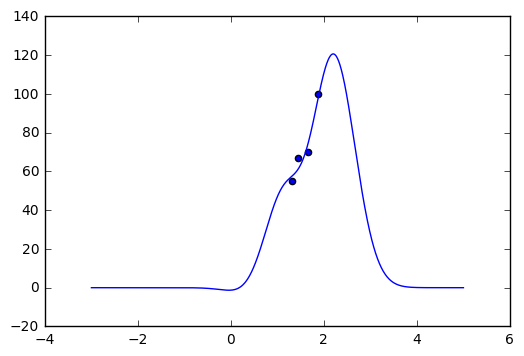

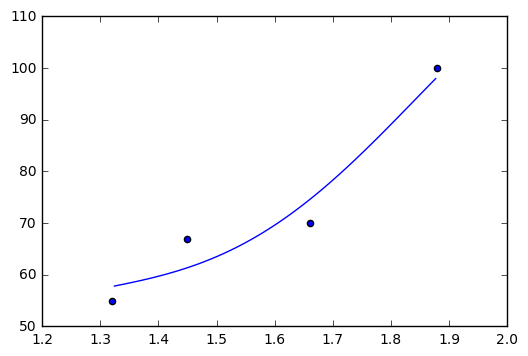

In [69]:
# strene's code

heights = np.asarray([1.32, 1.45, 1.66, 1.88]).reshape(-1, 1) #feature 1
weights = np.asarray([55, 67, 70, 100]).reshape(-1, 1) # Y

# rbf centers
centers = np.asarray([1.0, 1.2, 1.4, 1.6, 1.8, 2.0]).reshape(-1, 1) 

print("centers.shape", centers.shape)
print("heights.shape", heights.shape)
print("weights.shape", weights.shape)

# I recommend playing around with these parameters and seeing how well you fit
# the data.  Changing one of the parameters will change the optimal value of
# the other:

sigma = 0.5 # width
alpha = 0.0001 #lmabda

# New representation:
x = rbf_kernel(heights, centers, gamma=1 / sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, weights)
print("Score on training data = ", regr.score(x, weights))
all_x = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

# New representation:
expanded_x = rbf_kernel(all_x, centers, gamma=1 / sigma)
all_y = regr.predict(expanded_x)
print("all_x.shape", all_x.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", all_y.shape)

# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_x, all_y)
plt.scatter(heights, weights)

# Zoom in and see how well predictions fit the data
zoom_ind = (all_x > heights.min()) & (all_x < heights.max())
plt.figure()
plt.plot(all_x[zoom_ind], all_y[zoom_ind])
plt.scatter(heights, weights)
plt.show()

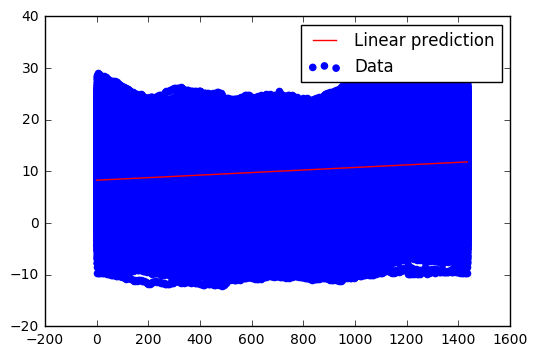

In [89]:
years = range(2011, 2017)
files = ['yosemite-temperatures/yosemite_village/CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]
usecols = [1, 2, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = data[:, 2] > -1000

x_train = data[valid, 1].reshape(-1, 1)
y_train = data[valid, 2]
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

x_predict = [[0], [1435]]
y_predict = regr.predict(x_predict)

plt.scatter(data[valid, 1], data[valid, 2], label='Data', color='b')
plt.plot(x_predict, y_predict, label='Linear prediction', color='r')
plt.legend(loc='best')
plt.show()

* import all data *

In [39]:
features = ('WBAN_number', 'UTC_date', 'UTC_time', 'LST_date', 'LST_time', 'CRX_version',
        'longitude', 'latitude', 'air_temperature', 'precepitation', 'solar_radiation',
        'SR_flag', 'surface_temperature', 'ST_type', 'ST_flag', 'relative_humidity', 'RH_flag',
        'soil_moisture', 'soil_temperature', 'wetness', 'wet_flag', 'wind', 'wind_flag')

train_year = range(2011, 2017)

path = 'yosemite-temperatures/yosemite_village/CRNS0101-05-{year}-CA_Yosemite_Village_12_W.txt'

all_data = pd.concat(
    [pd.read_table(path.format(year=year), sep=r'\s+', 
                       header=None, names=features, converters={'UTC_time': lambda x: str(x)})#, parse_dates=[['UTC_date', 'UTC_time']])
                                       for year in train_year])

print(all_data.shape)
all_data.head()

(631296, 23)


,WBAN_number,UTC_date,UTC_time,LST_date,LST_time,CRX_version,longitude,latitude,air_temperature,precepitation,...,ST_type,ST_flag,relative_humidity,RH_flag,soil_moisture,soil_temperature,wetness,wet_flag,wind,wind_flag
0,53150,20110101,0005,20101231,1605,2,-119.82,37.76,-6.4,0.0,...,U,0,-9999,0,-99.0,-9999.0,1218,0,-99.0,0
1,53150,20110101,0010,20101231,1610,2,-119.82,37.76,-6.5,0.0,...,U,0,-9999,0,-99.0,-9999.0,1223,0,-99.0,0
2,53150,20110101,0015,20101231,1615,2,-119.82,37.76,-6.5,0.0,...,U,0,-9999,0,-99.0,-9999.0,1223,0,-99.0,0
3,53150,20110101,0020,20101231,1620,2,-119.82,37.76,-6.5,0.0,...,U,0,-9999,0,-99.0,-9999.0,1224,0,-99.0,0
4,53150,20110101,0025,20101231,1625,2,-119.82,37.76,-6.7,0.0,...,U,0,-9999,0,-99.0,-9999.0,1210,0,-99.0,0


*slice only relevant features *

In [40]:
relevant_features = ['UTC_date','UTC_time', 'air_temperature']

all_data = all_data.loc[:,relevant_features]
# valid_data = valid_temperature_data.loc[:,relevant_features]
# test_data = test_temperature_data.loc[:,relevant_features]


# print train_data.shape
# print valid_data.shape
# print test_data.shape

all_data.head()


,UTC_date,UTC_time,air_temperature
0,20110101,0005,-6.4
1,20110101,0010,-6.5
2,20110101,0015,-6.5
3,20110101,0020,-6.5
4,20110101,0025,-6.7


In [41]:
all_data.dtypes

UTC_date             int64
UTC_time            object
air_temperature    float64
dtype: object

*date *

In [42]:
# all_data.UTC_date = pd.to_datetime(all_data.UTC_date, format='%Y%m%d', errors='coerce')
# valid_data.UTC_date = pd.to_datetime(valid_data.UTC_date, format='%Y%m%d', errors='coerce')
# test_data.UTC_date = pd.to_datetime(test_data.UTC_date, format='%Y%m%d', errors='coerce')

# train_data.UTC_time = pd.to_datetime(train_data.UTC_time, format='%H%M', errors='coerce').dt.time
# valid_data.UTC_time = pd.to_datetime(valid_data.UTC_time, format='%H%M', errors='coerce').dt.time
# test_data.UTC_time = pd.to_datetime(test_data.UTC_time, format='%H%M', errors='coerce').dt.time

to_min = lambda x: np.floor_divide(x, 100) * 60 + np.mod(x, 100)
to_day = lambda x: datetime.strptime(str(x), '%Y%m%d').timetuple().tm_yday
 

all_data.UTC_time = all_data.UTC_time.astype('int').apply(to_min)
all_data.UTC_date = all_data.UTC_date.apply(to_day)

# valid_data.UTC_time = valid_data.UTC_time.astype('int').apply(to_min)
# test_data.UTC_time = test_data.UTC_time.astype('int').apply(to_min)

all_data.head()


,UTC_date,UTC_time,air_temperature
0,1,5,-6.4
1,1,10,-6.5
2,1,15,-6.5
3,1,20,-6.5
4,1,25,-6.7


*check for n/a* 

In [43]:
print (all_data.isnull().sum())
# print (test_data.isnull().sum())
# print (test_data.isnull().sum())

UTC_date           0
UTC_time           0
air_temperature    0
dtype: int64


*check for outliers*

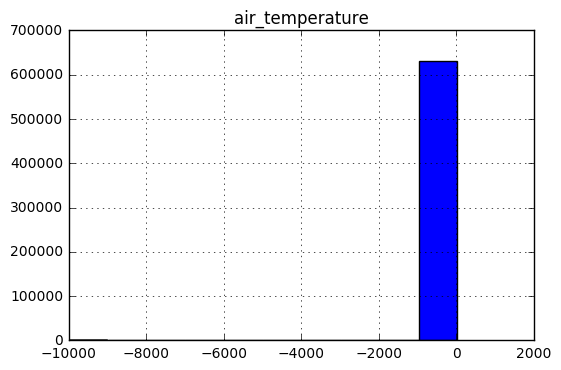

-9999.0


In [44]:
all_data.hist(column = 'air_temperature')
plt.show()
print min(all_data.air_temperature)

*drop -9999 values*

In [45]:
all_data = all_data.replace({-9999.0: None}).dropna()
# valid_data = valid_data.replace({-9999.0: None}).dropna()
# test_data = test_data.replace({-9999.0: None}).dropna()

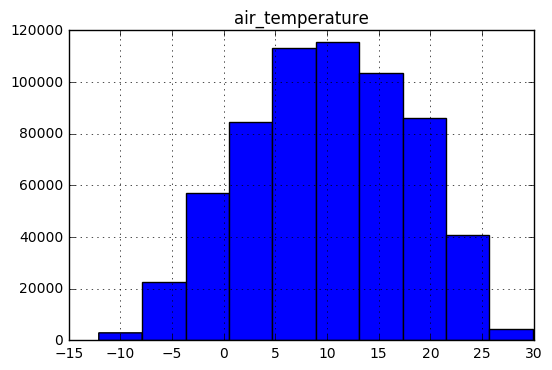

In [46]:
all_data.hist(column = 'air_temperature')
# valid_data.hist(column = 'air_temperature')
# test_data.hist(column = 'air_temperature')
plt.show()


In [73]:
centers_m = np.linspace(0,1440,300).reshape(-1, 1) 
centers_d = np.linspace(0,365,200).reshape(-1, 1) 

X_m = all_data.UTC_time.reshape(-1, 1)
X_d = all_data.UTC_date.reshape(-1, 1)

X = np.concatenate((X_m, X_d), axis=1)

(x_train, x_test, y_train, y_test) = train_test_split(X , all_data.air_temperature, test_size=0.1, random_state=5)


sigma_range = np.linspace(20, 50, 5)
alpha = 0.001 #lmabda


print all_data.UTC_time.reshape(-1, 1).shape
print all_data.UTC_date.reshape(-1, 1).shape
print X.shape
x_train[:,0].shape

(630854, 1)
(630854, 1)
(630854, 2)


(567768,)

In [71]:
#heights = x_train
#temp = y_train

err_array = {}
for sigma in sigma_range:
    # New representation:
    
    
    x_m = rbf_kernel(x_train[:,0], centers_m, gamma=1 / sigma)
    x_d = rbf_kernel(x_train[:,1], centers_d, gamma=1 / sigma)

    x = np.concatenate((x_m, x_d), axis=1)
    print x.shape
    
    regr = Ridge(alpha=alpha, fit_intercept=False)
    
    err = cross_val_score(regr, x, y_train, cv=5, scoring="r2")
    
    err_array[sigma]=np.mean(err)
    


/Users/gilikarni/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 567768 while Y.shape[1] == 1

In [54]:
print err_array



{27.5: -0.30686998177146224, 42.5: -0.30291157097917776, 50.0: -0.3009332845714342, 35.0: -0.30489089602278024, 20.0: -0.30885188042292888}


In [55]:
sigma = 30
x_tr = rbf_kernel(x_train, centers, gamma=1 / sigma)
x_ts = rbf_kernel(x_test, centers, gamma=1 / sigma)

regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x_tr, y_train)

test_predictions = regr.predict(x_ts)

for metric in (metrics.mean_squared_error, metrics.mean_absolute_error, 
               metrics.median_absolute_error, metrics.r2_score): 
    
    print(metric.__name__, metric(test_predictions, y_test))

('mean_squared_error', 61.05773065446656)
('mean_absolute_error', 6.5088755691144362)
('median_absolute_error', 5.9789841977116591)
('r2_score', -1.9345060894373806e+31)
